In [2]:
%matplotlib inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
### impoteren function 
def sigmoid(w,b,range=10):
    """
    
    """
        
    f = lambda x : 1/(1+np.exp(-x))
    x = np.linspace(-range,range)
    x = np.array([x,x]).T
    z = np.array( [ np.array(w).dot(i)+b for i in x])
    result = np.array([f(i) for i in z])
    return z,result

def error_0(x):
       return  -np.log(1-x)
    
def error_1(x):
      return -np.log(x)

# Cost function -logistic regresion notes

Suppose we have a generic training set N: 
$$N={(x^{1},y^{1}),(x^{2},y^{2}),(x^{3},y^{3}),...,(x^{m},y^{m})}$$
made of m training examples where $ (x^{1},y^{1})$ is the first example and so on.More specificaly $x^{m}$ is the m-th imput variable of m ,while $y^{m}$ is its output,traget or label variable .Being this classification every output variable $y^{m}$
is bound between {0,1}. $y \in [0,1]$.
Each example $x^{n}$ is represented as usual by its feature vector
$$ \vec{x} =\quad  \begin{bmatrix}   x_0 \\ x_1 \\ ... \\ x_n\end{bmatrix}\quad  $$
where $x_0 = 1$ always .This generic example we don't know the exact  number of feature .Finaly we have a hypotesis function of logistic regresion ,matematicaly written as :
 $$h_{\theta}(\vec{x})= \frac{1}{1+e^{-\vec{\theta}.\vec{X}}}=\frac{1}{1+e^{-\theta^T.X}}$$
 $h_{\theta}(X)$ is also called sigmoid function ,graphicaly look like this :
 
 

Text(0.5, 1.0, 'SIgmoid')

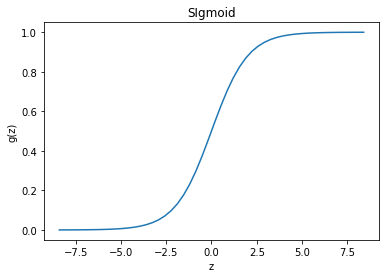

In [4]:
x,y = sigmoid([0.001,0.004],0.0008,range=1680)
plt.plot(x,y)
plt.xlabel('z')
plt.ylabel('g(z)')
plt.title('SIgmoid')

For now we just to notice that the most importent properties the sigmoid function varies between $y\in [0,1]$  for every $x\in [- \infty,\infty]$ <br>
This mathematicaly propeties is verry can be expremy useful for clasification problem.
The main puprose of logistic regression is to chose the best parametes $\Theta s = \Theta_0,\Theta_1,..,\Theta_m $  acording to given training set in order to minimize errors.
* The good known gradient descent is not able to do this optimizsation problem ,because the function is not convent ,it has a many minimum ,therefore we have to choose other method for optimization
The cost fucntion for Logistic regression is difined as :
$$   Cost(h_{\Theta}(x),y) = \Bigg( \begin{matrix}  -log(h_{\Theta}(x)) && if\; y=1 \\log( 1 - h_{\Theta}(x)) && if\; y=0\end{matrix}\Bigg)  $$

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


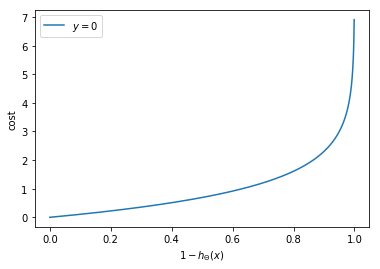

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


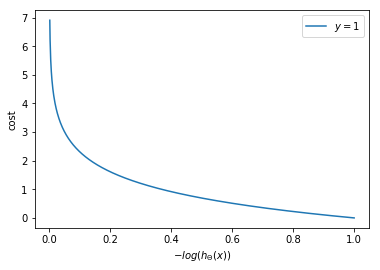

In [14]:
sigmoid_values = np.linspace(0, 1, 1000)
plt.plot(sigmoid_values, error_0(sigmoid_values), label = "$y=0$")
plt.xlabel(r'$log(1 - h_{\Theta}(x))$')
plt.ylabel('cost')
plt.legend()
plt.show()
plt.plot(sigmoid_values, error_1(sigmoid_values), label = "$y=1$")
plt.xlabel(r'$-log(h_{\Theta}(x))$')
plt.ylabel('cost')
plt.legend()
plt.show()

we have just seen is the  verbose version of cost function for logistic regression ,We can make it more compact into a one line
expression : this help us to avoiding boring if/else statement when converting this formula into an algorithm. : The expresion looks like this : <br> <br>
$$ Cost(h_{\Theta}(x),y) = -y.log(h_{\Theta}(x)) - (y-1)log(1 - h_{\Theta}(x))$$ 

The logistic regression cost function for all input variable can be rewritten as :
  $$ J(\Theta) = \sum_i^mCost(h_{\Theta}(x_i),y_i)=-\frac{1}{m}\big(\sum_i^my_i.log(h_{\Theta}(x_i)) + (y_i-1)log(1 - h_{\Theta}(x_i))\big)$$

The next step is to minimize cost function : $\underset{min \;  \Theta }{J(\Theta)}$